In [1]:
# importing the packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Learned Frequencies by Epoch Plot

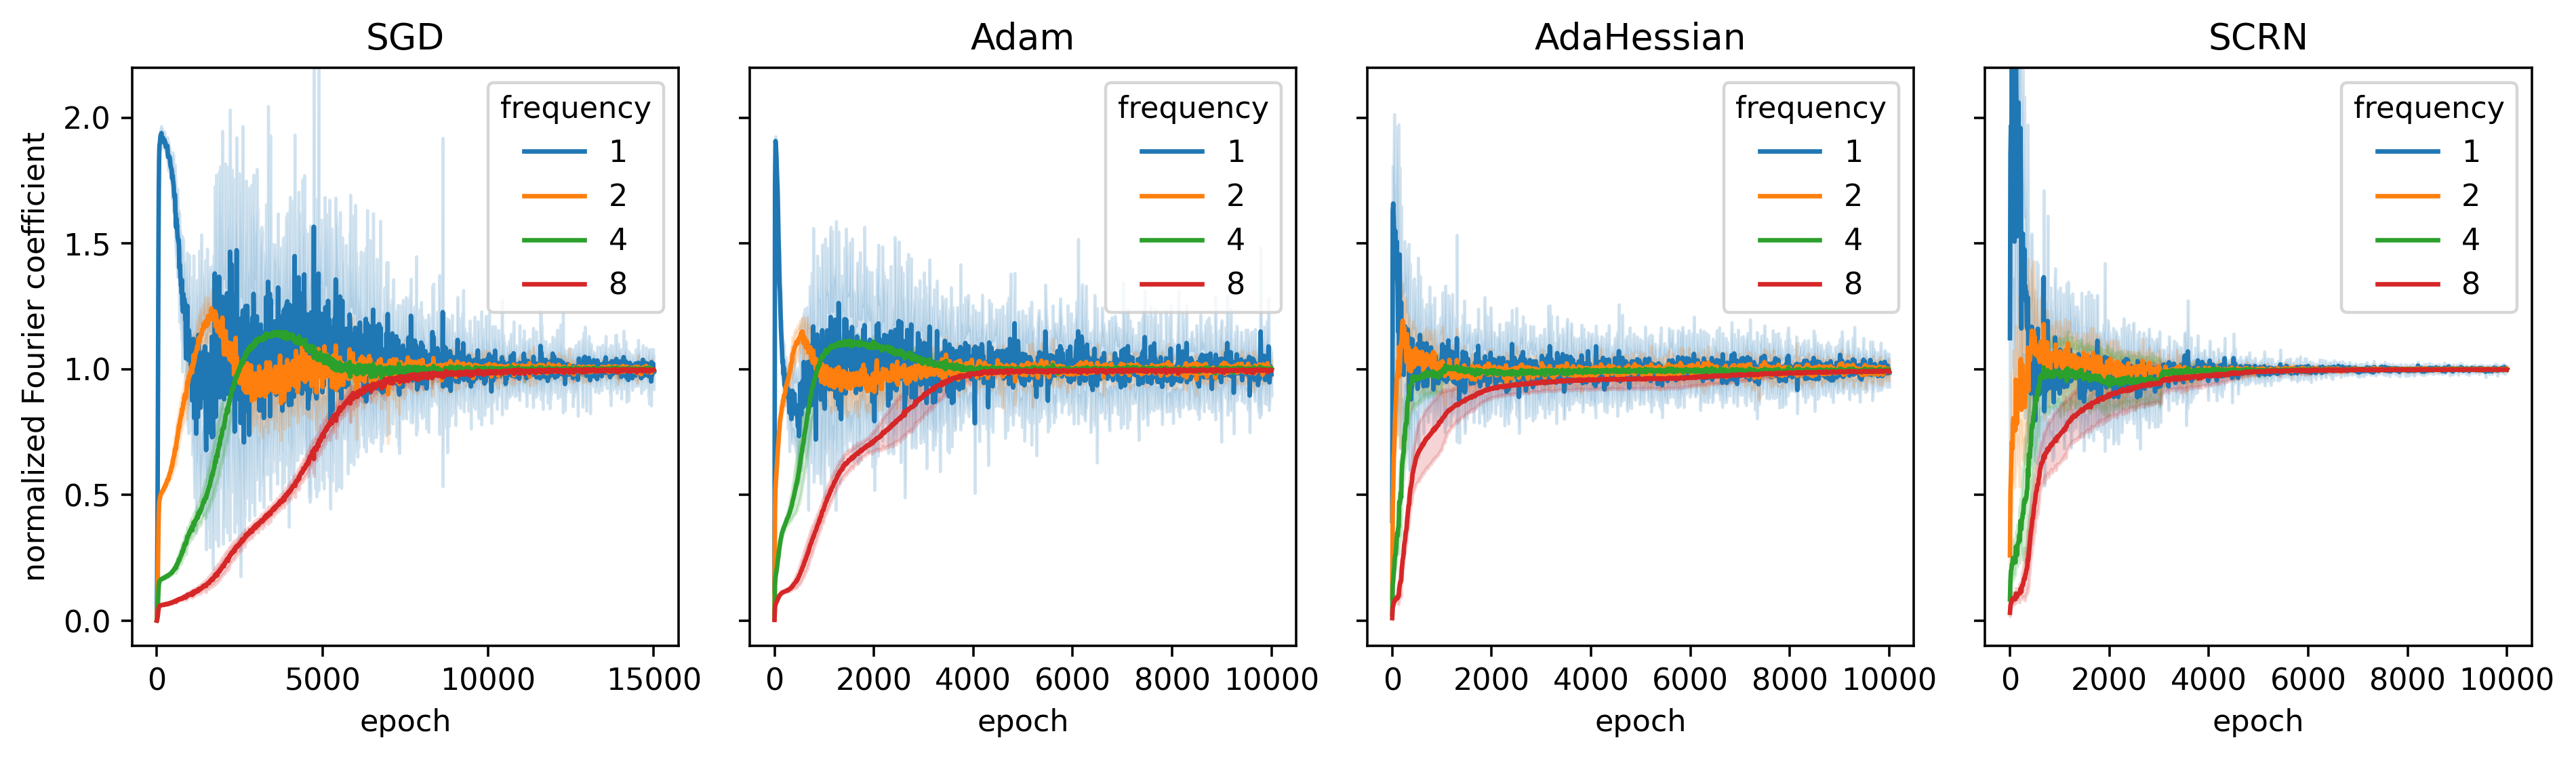

In [2]:
# General settings of our experiment
number_of_experiments = 10
amps = np.array([0.25, 0.5, 0.75, 1.0])
freq_indices = np.array([1, 2, 4, 8])
opts = ['SGD', 'Adam', 'AdaHessian', 'SCRN']
fig, axs = plt.subplots(1, 4, figsize=(12, 3.6), sharey=True, dpi=320)
for j in range(len(opts)):
    # Extracting info from training logs
    loss, freq, time = [], [], None
    for i in range(number_of_experiments):
        with open(f"./results_synthetic/{opts[j].lower()}_{i}.npz", "rb") as f:
            npzfile = np.load(f)
            loss.append(npzfile['loss'])
            freq.append(npzfile['freq'])
            time = npzfile['time']
    loss = np.array(loss)
    freq = np.array(freq)
    # Drawing the plots
    df = pd.DataFrame()
    df['epoch'] = np.tile(time, len(freq_indices) * number_of_experiments)
    df['frequency'] = freq_indices.repeat(len(time) * number_of_experiments)
    df['normalized Fourier coefficient'] = np.concatenate([freq[j, :, freq_indices[i]] / amps[i] for i in range(len(freq_indices)) for j in range(number_of_experiments)])
    df['frequency'] = df['frequency'].apply(str)
    sns.lineplot(data=df, x="epoch", y="normalized Fourier coefficient", hue="frequency", ci='sd', ax=axs[j])
    axs[j].set_title(opts[j])
plt.ylim([-0.1, 2.2])
plt.tight_layout()
plt.savefig('synthetic_freq.pdf')

# Loss of Different Optimizers by Epoch Plot

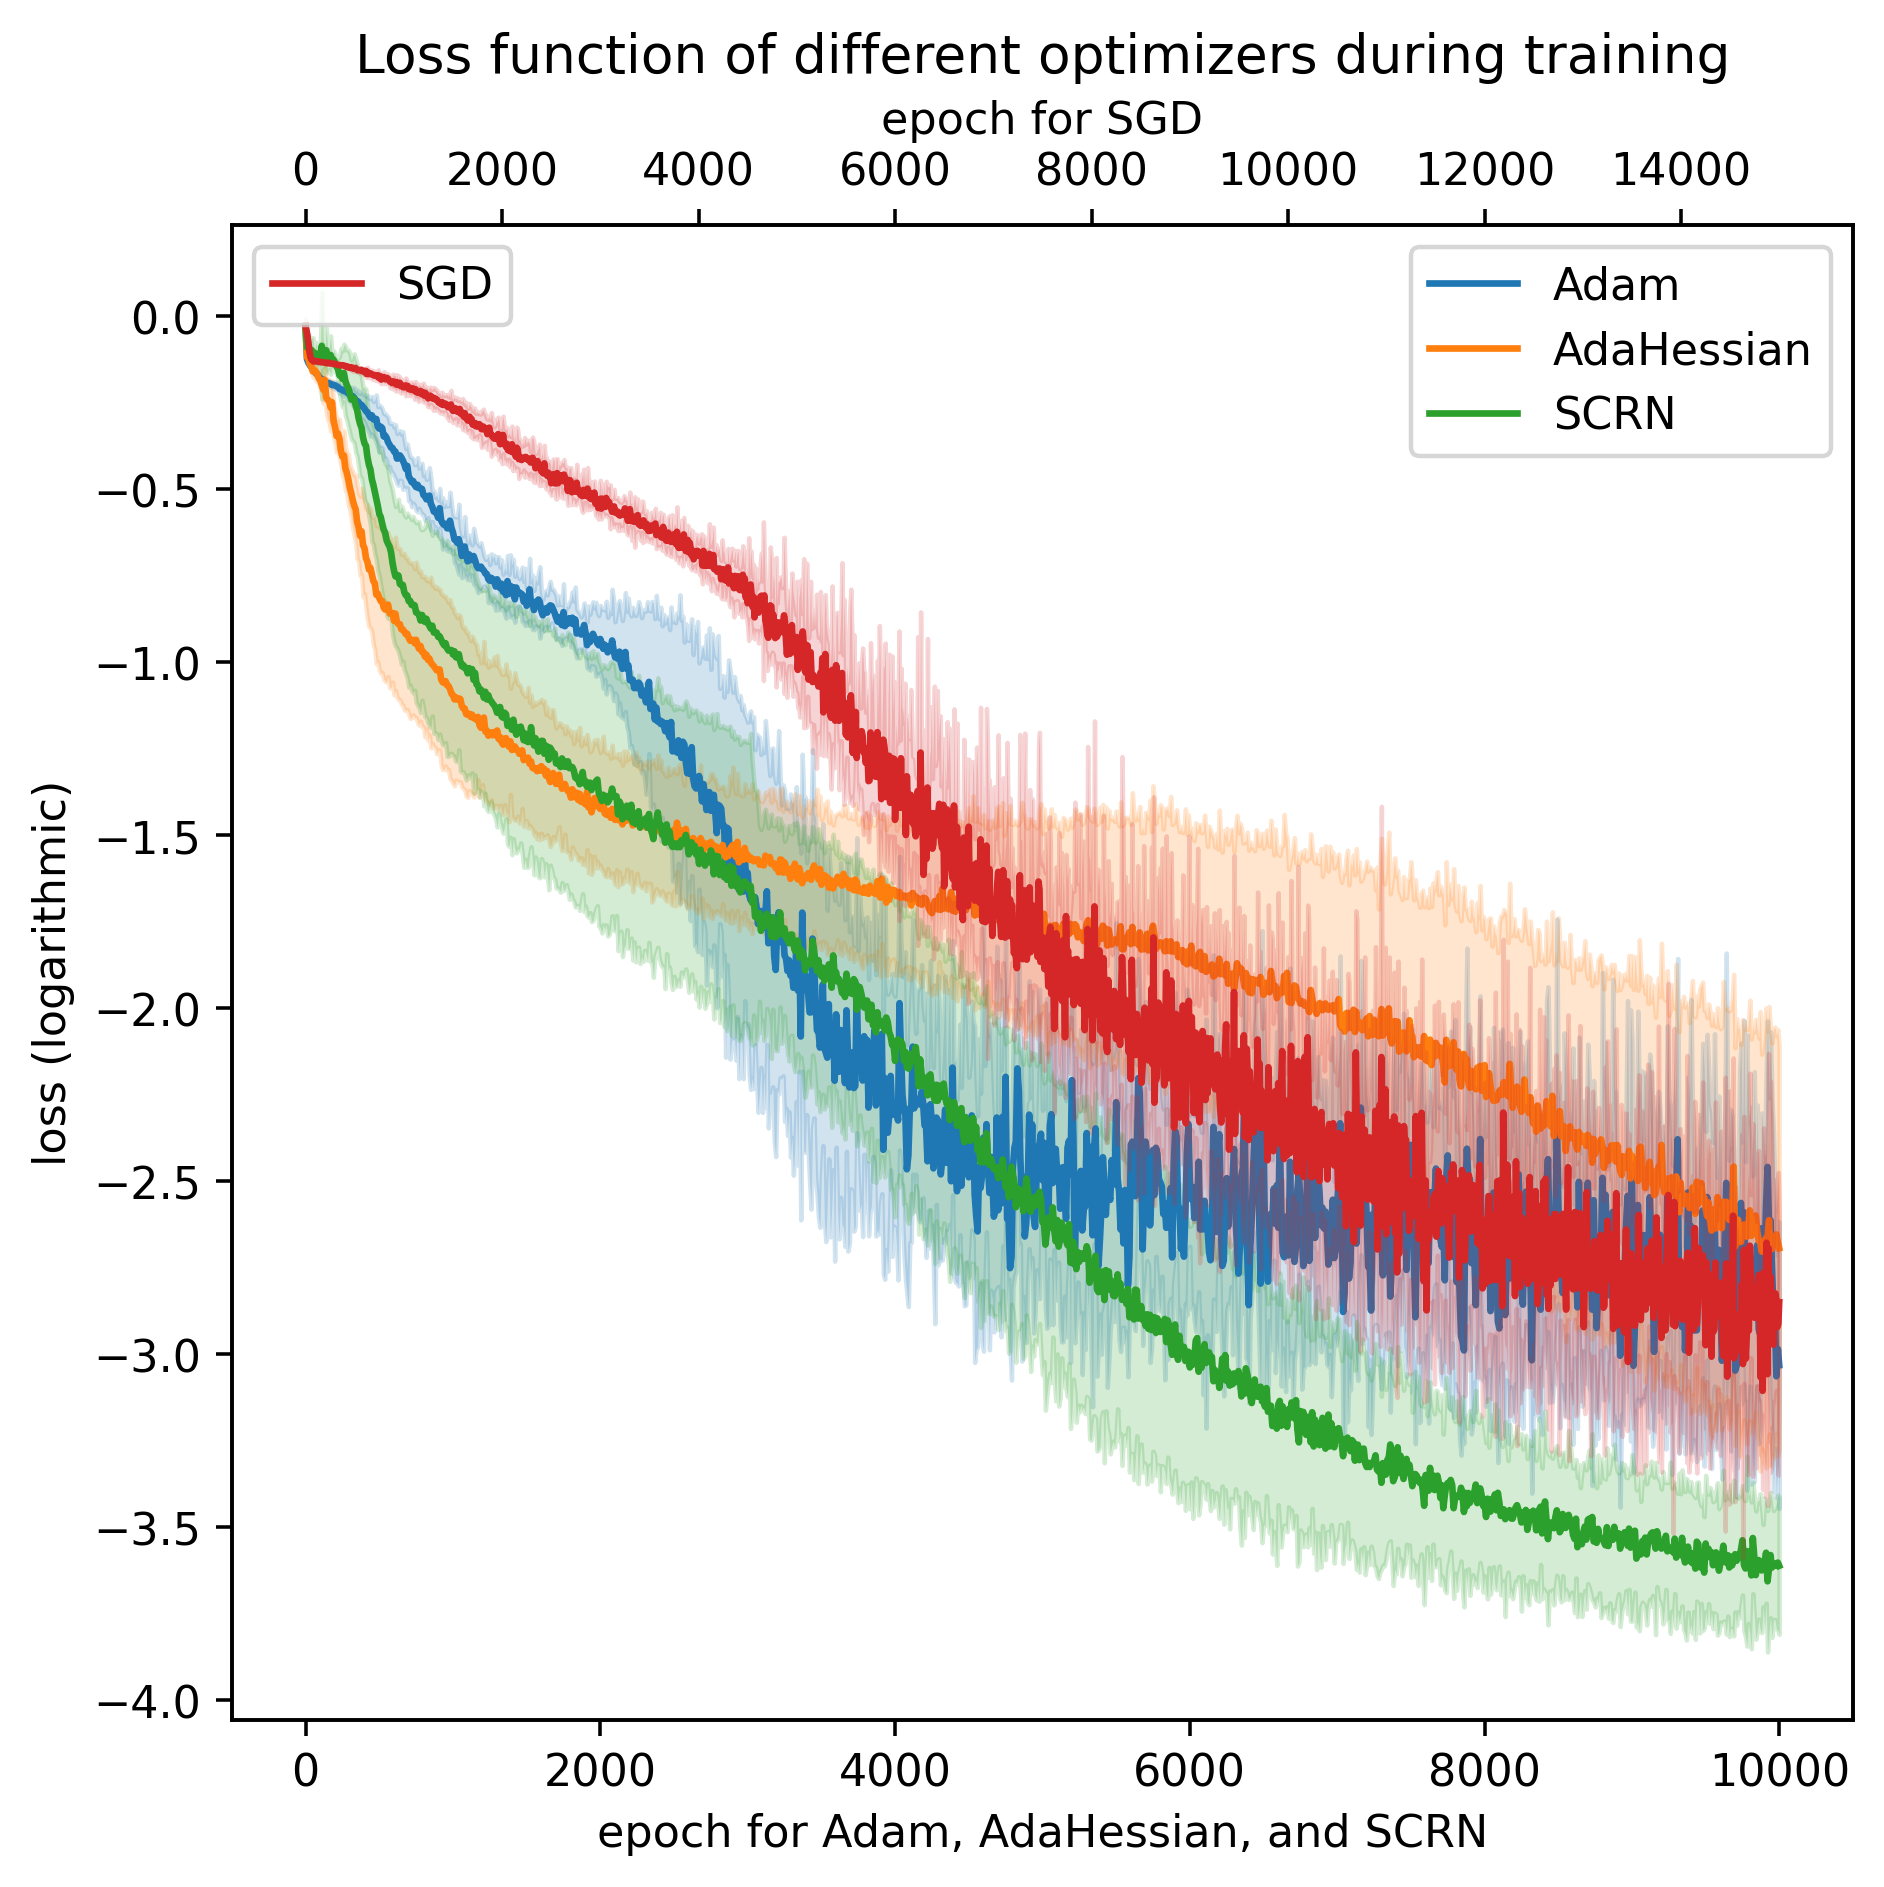

In [3]:
# General settings of our experiment
number_of_experiments = 10
amps = np.array([0.25, 0.5, 0.75, 1.0])
freq_indices = np.array([1, 2, 4, 8])
opts = ['SGD', 'Adam', 'AdaHessian', 'SCRN']
# Plot configuration
fig, ax = plt.subplots(figsize=(6, 6), dpi=320)
ax2 = ax.twiny()
for j in range(len(opts)):
    # Extracting info needed for the plot from training logs
    loss, freq, time = [], [], None
    for i in range(number_of_experiments):
        with open(f"./results_synthetic/{opts[j].lower()}_{i}.npz", "rb") as f:
            npzfile = np.load(f)
            loss.append(npzfile['loss'])
            freq.append(npzfile['freq'])
            time = npzfile['time']
    loss = np.array(loss)
    freq = np.array(freq)
    
    ax_wanted = ax2 if opts[j] == 'SGD' else ax
    df = pd.DataFrame()
    df['epoch'] = np.tile(time, number_of_experiments)
    df['loss (logarithmic)'] = np.concatenate([np.log10(loss[i]) for i in range(number_of_experiments)])
    if opts[j] == 'SGD':
        sns.lineplot(data=df, x="epoch", y="loss (logarithmic)", ci='sd', ax=ax2, label=opts[j], color='#d62728')
    else:
        sns.lineplot(data=df, x="epoch", y="loss (logarithmic)", ci='sd', ax=ax, label=opts[j])

ax2.legend(loc='upper left')
ax.set_xlabel("epoch for Adam, AdaHessian, and SCRN")
ax2.set_xlabel("epoch for SGD")
plt.title('Loss function of different optimizers during training')
plt.tight_layout()
plt.savefig('synthetic_loss.pdf')

# Code for values of different frequencies when loss function becomes less than a threshold

In [4]:
# threshold
loss_value_to_inspect_at = 0.2
for j in range(len(opts)):
    loss, freq, time = [], [], None
    for i in range(number_of_experiments):
        with open(f"./results_synthetic/{opts[j].lower()}_{i}.npz", "rb") as f:
            npzfile = np.load(f)
            loss.append(npzfile['loss'])
            freq.append(npzfile['freq'])
            time = npzfile['time']
    
    freqs_wanted = []
    for i in range(number_of_experiments):
        # First index refers to the first time that loss becomes less than the threshold.
        first_index = np.arange(len(loss[i]))[loss[i] <= loss_value_to_inspect_at][0]
        freqs_wanted.append(freq[i][first_index, freq_indices])
    print(opts[j], (np.array(freqs_wanted).mean(axis=0) / amps).round(3))
    
    

SGD [1.043 0.99  1.143 0.497]
Adam [0.947 0.956 1.081 0.487]
AdaHessian [1.054 1.02  1.005 0.591]
SCRN [0.863 1.063 0.972 0.585]
